In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from datetime import datetime

# from oceantracker.post_processing.read_output_files import load_output_files 
from oceantracker.util.polygon_util import InsidePolygon
from oceantracker.post_processing.read_output_files.load_output_files import load_grid
# from oceantracker.post_processing.plotting import plot_statistics
# from oceantracker.post_processing.plotting import stats_plot 


In [2]:
df = nc.Dataset('/scratch/local1/baw/f.AZHel_FT_REF.3D.cut.nc')
df

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    history: Mon Feb 22 10:38:55 2021: ncks -d nMesh2_data_time,3660,3804 f.AZHel_FT_REF.3D.nc f.AZHel_FT_REF.3D.cut.nc
02/26/2020-12:08:05.748000000 CET, /net/themis/system/akprog/bin/i18/untrim2009_2020_01_30.i18, Grid_File\n02/26/2020-12:23:25.009000000 CET, /net/themis/system/akprog/bin/i18/untrim2009_2020_01_30.i18, utromp2009.dat
    comment: Referenzlauf Forum Tideelbe
    geospatial_lat_min: 53.05845720212422
    geospatial_lat_max: 54.30507061103671
    geospatial_lat_units: degrees_north
    geospatial_lat_resolution: on average     191.15 meters
    geospatial_lon_min: 7.678374981676119
    geospatial_lon_max: 10.337266214791454
    geospatial_lon_units: degrees_east
    geospatial_lon_resolution: on average     191.15 meters
    title: Elbe: Modellaufbau 2016
    Conventions: CF-1.7, UGRID-1.0, GDI-BAW-1.3
    institution: Bundesanstalt fuer Wasserbau - Federal Waterways Engineerin

## Looking at BAW data

In [3]:
_ = [print(i) for i in df.variables.keys()]

Combined_Mesh2_and_SubMesh2
Mesh2
Mesh2_Schwebstoffklassen_2d
Mesh2_crs
Mesh2_edge_Durchflussflaeche_3d
Mesh2_edge_Gesamtwassertiefe_an_Kanten_2d
Mesh2_edge_Stroemungsgeschwindigkeit_x_R_3d
Mesh2_edge_Stroemungsgeschwindigkeit_y_R_3d
Mesh2_edge_Stroemungsgeschwindigkeit_z_R_3d
Mesh2_edge_bc
Mesh2_edge_faces
Mesh2_edge_lat
Mesh2_edge_lat_bnd
Mesh2_edge_lon
Mesh2_edge_lon_bnd
Mesh2_edge_nasse_Laenge_an_Kanten_2d
Mesh2_edge_nodes
Mesh2_edge_skalare_Stroemungsgeschwindigkeit_3d
Mesh2_edge_x
Mesh2_edge_x_bnd
Mesh2_edge_y
Mesh2_edge_y_bnd
Mesh2_edge_z_edge_3d
Mesh2_edge_z_edge_bnd_3d
Mesh2_face_Gesamtwassertiefe_2d
Mesh2_face_Salzgehalt_3d
Mesh2_face_Schwebstoffgehalt_3d
Mesh2_face_Temperatur_3d
Mesh2_face_Wasserflaeche_2d
Mesh2_face_Wasserstand_2d
Mesh2_face_Wasservolumen_3d
Mesh2_face_bc
Mesh2_face_center_lat
Mesh2_face_center_lon
Mesh2_face_center_x
Mesh2_face_center_y
Mesh2_face_colour
Mesh2_face_edges
Mesh2_face_lat
Mesh2_face_lat_bnd
Mesh2_face_lon
Mesh2_face_lon_bnd
Mesh2_face_nodes
M

In [6]:
df = nc.Dataset('/scratch/local1/hzg2/schout_1.nc')

<class 'netCDF4._netCDF4.Variable'>
float32 turbidity(nSCHISM_hgrid_node)
    units: kg/l
    long_name: Water Turbidity
    description: Turbidity based on BAW data from Arne Hammrich. Average of 3D data over time and depth
unlimited dimensions: 
current shape = (32432,)
filling on, default _FillValue of 9.969209968386869e+36 used

## Looking at HZG data

In [2]:
path_to_dir = '/scratch/local1/output/22_11_01_depth_losses_v07/22_11_01_depth_losses_v07R01_caseInfo.json'
grid = load_grid(path_to_dir)

In [11]:
%matplotlib widget

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
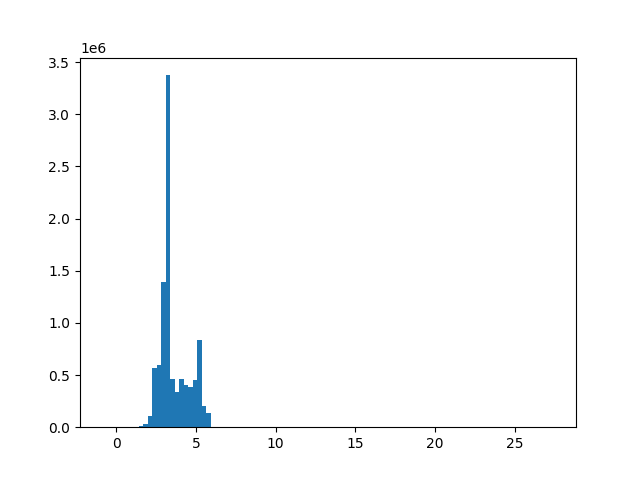

In [25]:
df = nc.Dataset('/scratch/local1/hzg2/schout_1.nc')
temp = df.variables['temp'][:]

plt.figure()
out = plt.hist(temp.flatten(), bins=100)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
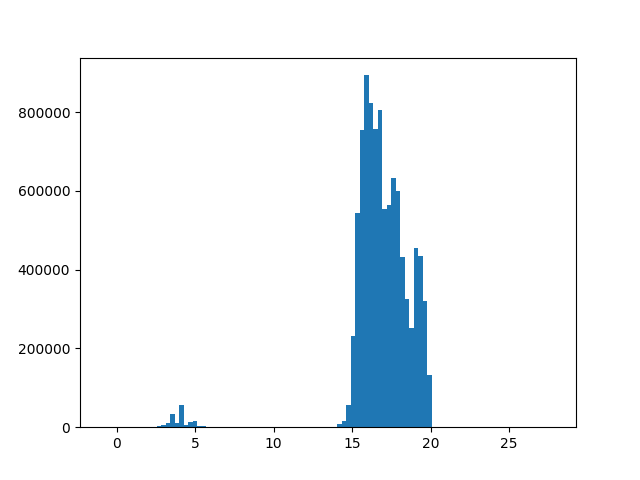

In [26]:
df = nc.Dataset('/scratch/local1/hzg2/schout_170.nc')
temp = df.variables['temp'][:]

plt.figure()
out = plt.hist(temp.flatten(), bins=100)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
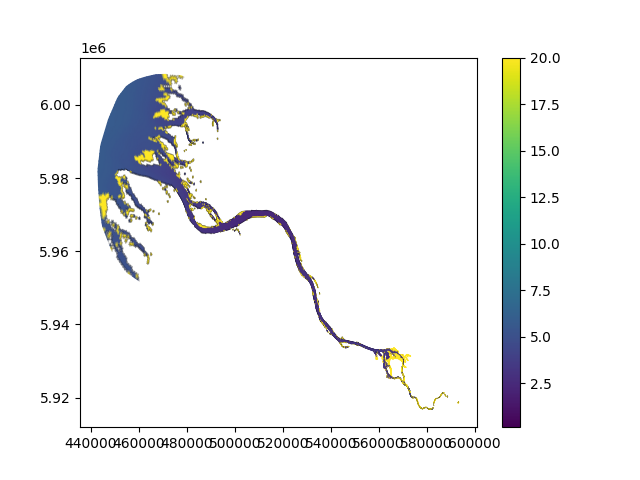

In [22]:
df = nc.Dataset('/scratch/local1/hzg2/schout_1.nc')

temp = df.variables['temp'][:]
x = grid['x']
triangles = grid['triangles']

fig, ax = plt.subplots()
t = ax.tripcolor(x[:, 0], x[:, 1], triangles, temp.data.mean(axis=(0,2)), shading='gouraud', vmax=20)
# add colorbar
fig.colorbar(t, ax=ax)

/home/zmaw/u301513/.conda/envs/oceantracker/lib/python3.9/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


array([         inf, 4.747243e+35, 4.747243e+35, ...,          inf,
                inf,          inf], dtype=float32)

In [ ]:

temp = df.variables['temp'][:]


## Relative velocity of two particles?

### 1D

0.952623948951129
1.126838765441826


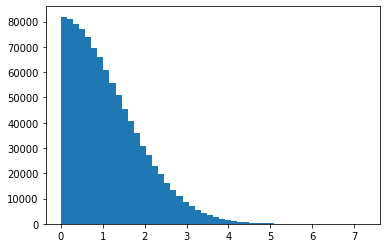

In [23]:
sigma = 1
samples = int(1e6)
random_velocities = np.array( (np.random.normal(0,sigma,samples), np.random.normal(0,sigma,samples)) )
random_velocities = np.transpose(random_velocities)

# flip sign of second to make velocities relative
random_velocities[:,1] = -random_velocities[:,1]

# sum up to get the relative velocity
relative_velocities = np.sum(random_velocities, axis=1)

# take the absolute value
relative_velocities = np.abs(relative_velocities)

hist = plt.hist(relative_velocities,bins=50)

# print median
print(np.median(relative_velocities))

print(np.mean(relative_velocities))


### 3D

In [36]:
sigma = 1
samples = int(10)
random_velocities = np.array(( np.random.normal(0,sigma,(samples,3)),np.random.normal(0,sigma,(samples,3)) ))  
# swap array axis 0 and 1
random_velocities = np.swapaxes(random_velocities,0,1)
random_velocities.shape

(10, 2, 3)

In [ ]:
def relative_velocity(A, B):
    """
    Calculate the projection of the relative velocity of two particles onto the line connecting them.

    Parameters:
    A (tuple): Contains position and velocity of particle A as (pos_A, vel_A).
    B (tuple): Contains position and velocity of particle B as (pos_B, vel_B).

    Returns:
    numpy.ndarray: The projected relative velocity vector onto the line AB.
    """
    pos_A, vel_A = A
    pos_B, vel_B = B

    # Convert positions and velocities to numpy arrays for vector operations
    pos_A = np.array(pos_A)
    pos_B = np.array(pos_B)
    vel_A = np.array(vel_A)
    vel_B = np.array(vel_B)

    # Calculate the relative velocity
    v_AB = vel_A - vel_B

    # Calculate the unit vector along line AB
    r_AB = pos_B - pos_A
    unit_AB = r_AB / np.linalg.norm(r_AB)

    # Project the relative velocity onto the line AB
    v_proj_on_AB = np.dot(v_AB, unit_AB) * unit_AB

    return v_proj_on_AB

"""
the above is wrong.
a much better aproach is to calculated the "covered volume" of the particle and the particle cloud.
"""


0.04932817

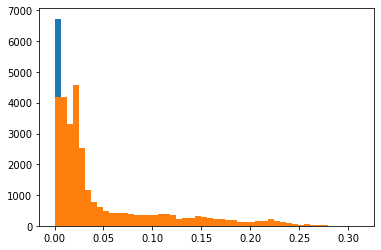

In [28]:
out = plt.hist(df.variables['turbidity'][:].flatten(),bins=50)
# drop 0 values from turbidty (artifacts from interpolation/merging)
out = plt.hist(df.variables['turbidity'][:].flatten()[df.variables['turbidity'][:].flatten() != 0],bins=50)

# mean
np.mean(df.variables['turbidity'][:].flatten()[df.variables['turbidity'][:].flatten() != 0])

In [77]:
# We have SPM in kg/m3.
# Through density and diameter we can estimate the volume accounted for by the cloud

dust_concentration = 0.05 # kg/m3
dust_particle_density = 2650 # kg/m3
dust_particle_diameter = 100e-6 # m

test_particle_diameter = dust_particle_diameter # m

volume_of_particle = 4/3 * np.pi * (dust_particle_diameter/2)**3
number_of_particles = dust_concentration / (dust_particle_density * volume_of_particle)
# print as exponent
print(f'Number of particles per m3: {number_of_particles:.2e}')

volume_occupied_by_dust_particles = number_of_particles * volume_of_particle
print(f'Volume occupied by dust particles per m3: {volume_occupied_by_dust_particles:.2e} m3')
# relative per m3
relative_volume_occupied_by_dust_particles = volume_occupied_by_dust_particles / 1.**3
print(f'Relative volume occupied by dust particles per m3: {relative_volume_occupied_by_dust_particles:.2e}')


Number of particles per m3: 3.60e+07
Volume occupied by dust particles per m3: 1.89e-05 m3
Relative volume occupied by dust particles per m3: 1.89e-05


In [78]:
# Define the parameters for the normal distribution
mu = 0  # mean
sigma = 1  # standard deviation

# Generate a sample from the distribution
sample_size = 1000000  # large sample size for better approximation
sample = np.random.normal(mu, sigma, sample_size)

# Calculate the mean of the absolute values of the sample
mean_abs = np.mean(np.abs(sample))
mean_abs


0.797722330328019

In [79]:
# Define the parameters for the normal distribution
mu = 0  # mean
sigma = 0.006  # standard deviation 

# Generate a sample from the distribution
sample_size = 1000000  # large sample size for better approximation
sample = np.random.normal(mu, sigma, sample_size)

# Calculate the mean of the absolute values of the sample
mean_abs = np.mean(np.abs(sample))
mean_abs


0.0047872470912912555

In [80]:
# move particles by mean_abs and calculate covered volume
# particles collide as soon as distance < r1+r2
# hence the volume covered regarding collisions is defined by (d1+d2)/2

# then following the the logic of Delichatsios 1975 the volume swept by the cloud is defined by
volume_swept_by_dust_particles = number_of_particles * np.pi * ((test_particle_diameter + dust_particle_diameter) / 2)**2 * mean_abs * 60
print(f'Volume swept by dust particles: {volume_swept_by_dust_particles:.2e} m3/s')

Volume swept by dust particles: 3.25e-01 m3/s


In [81]:
# volume swept by the test particle
volume_swept_by_test_particle = np.pi * (test_particle_diameter / 2)**2 * mean_abs * 60
print(f'Volume swept by test particle: {volume_swept_by_test_particle:.2e} m3/s')

Volume swept by test particle: 2.26e-09 m3/s


## new